# Regression : KNN

## 00 환경준비

### 01.Import

In [6]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 02.Data Loading

In [7]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|----|----|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 10.데이터 이해

## 20.데이터 준비

### 1) 데이터 준비

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

### 2) 변수정리

### 3) NA 조치

### 4) 가변수화

### 5) Scaling
KNN 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# 변수의 절대적인 수치에 따라 영향을 별로 주지 않는 변수가 유의미하게 보이거나 그 반대 효과가 나타날 수 있음

* 정규화 : Normalization, Min Max 방식
    * 모든 변수(열)의 값을 0 ~ 1 사이 값으로 변환

In [11]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,3.11
288,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,7.60
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,10.36
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,16.90
233,0.33147,0.0,6.20,0,0.507,8.247,70.4,3.6519,8,307,17.4,3.95


In [12]:
# .describe() 기초 통계량
x_train['age'].describe()

count    404.000000
mean      66.863861
std       28.132572
min        6.000000
25%       42.175000
50%       74.350000
75%       93.425000
max      100.000000
Name: age, dtype: float64

In [13]:
# 선언
scaler1 = MinMaxScaler()

# train으로 .fit + .transform(적용)
x_train_s1 = scaler1.fit_transform(x_train)

# val은 적용만
x_val_s1 = scaler1.transform(x_val)

* 표준화 : Standardization
    * 모든 변수(열)의 값을, 평균 = 0, 표준편차 = 1 을 갖도록 변환.
    * 정규분포의 의미는 아니다!

In [14]:
scaler2 = StandardScaler()
x_train_s2 = scaler2.fit_transform(x_train)
x_val_s2 = scaler2.transform(x_val)

* 스케일링을 수행하게 되면 결과가 넘파이 어레이로 저장되므로, 다루기 쉽게(.describe()를 사용하기 위해) 데이터프레임으로 변환합니다.
    * .describe() : 데이터프레임, 시리즈의 기초 통계량을 보여줌
    * list(데이터프레임) : 데이터 프레임의 칼럼이름을 반환.

In [15]:
x_train_s1 = pd.DataFrame(x_train_s1, columns = list(x))
x_train_s2 = pd.DataFrame(x_train_s2, columns = list(x))

In [16]:
x.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [17]:
x_train_s1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.036781,0.123354,0.376519,0.069307,0.330768,0.507123,0.647488,0.289496,0.349548,0.403338,0.614730,0.287034
std,0.098676,0.239799,0.253303,0.254290,0.240408,0.140416,0.299283,0.217180,0.366536,0.314076,0.233117,0.189457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000718,0.000000,0.163856,0.000000,0.122407,0.422768,0.384840,0.108567,0.130435,0.170172,0.457447,0.137900
50%,0.002424,0.000000,0.281525,0.000000,0.271784,0.485603,0.727128,0.234524,0.173913,0.270554,0.664894,0.247103
75%,0.027960,0.200000,0.646628,0.000000,0.466805,0.569159,0.930053,0.428455,0.304348,0.476099,0.808511,0.395350
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
x_train_s2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.319077e-17,-4.836615e-17,-4.396923e-18,5.056461e-17,4.177077e-17,-4.660738e-16,1.758769e-16,-1.275108e-16,0.000000,-1.407015e-16,-2.110523e-16,8.793846e-18
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00
min,-3.732034e-01,-5.150430e-01,-1.488282e+00,-2.728884e-01,-1.377567e+00,-3.616050e+00,-2.166148e+00,-1.334629e+00,-0.954835,-1.285798e+00,-2.640274e+00,-1.516919e+00
25%,-3.659183e-01,-5.150430e-01,-8.406002e-01,-2.728884e-01,-8.677729e-01,-6.014940e-01,-8.786781e-01,-8.341139e-01,-0.598536,-7.433069e-01,-6.755346e-01,-7.881449e-01
50%,-3.486057e-01,-5.150430e-01,-3.754866e-01,-2.728884e-01,-2.456512e-01,-1.534537e-01,2.664321e-01,-2.534318e-01,-0.479769,-4.232984e-01,2.154518e-01,-2.110315e-01
75%,-8.950514e-02,3.200222e-01,1.067670e+00,-2.728884e-01,5.665632e-01,4.423446e-01,9.453125e-01,6.406285e-01,-0.123470,2.319571e-01,8.322885e-01,5.724281e-01
max,9.773525e+00,3.660283e+00,2.464459e+00,3.664502e+00,2.787192e+00,3.514464e+00,1.179317e+00,3.275556e+00,1.776793,1.902097e+00,1.654737e+00,3.767879e+00


* 스케일링 한다고 분포의 모양이 바뀌지는 않는다

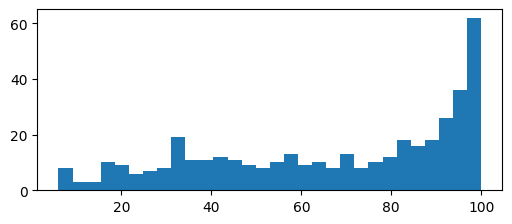

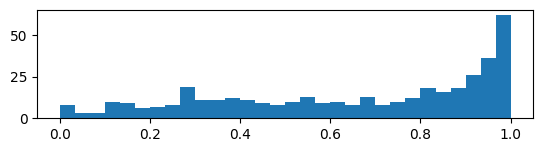

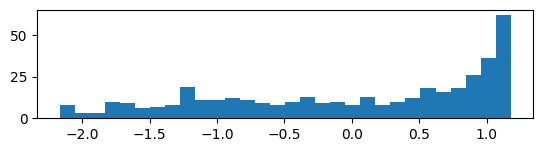

In [19]:
plt.figure(figsize=(6, 8))
plt.subplot(3, 1, 1)
plt.hist(x_train['age'], bins = 30)
plt.show()

plt.subplot(3, 1, 2)
plt.hist(x_train_s1['age'], bins = 30)
plt.show()

plt.subplot(3, 1, 3)
plt.hist(x_train_s2['age'], bins = 30)
plt.show()

## 30.모델링

### 1)import

In [1]:
# 모델링용
from sklearn.neighbors import KNeighborsRegressor

# 회귀모델 평가용
from sklearn.metrics import * # 모든 함수 다 불러와~

### 2) 모델선언

In [20]:
model = KNeighborsRegressor(n_neighbors = 3)

### 3) 모델링(학습)

In [21]:
model.fit(x_train_s1, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 4) 검증 : 예측

In [24]:
pred = model.predict(x_val_s1)

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### 5) 검증 : 평가

In [25]:
# MSE
mean_squared_error( y_val, pred)

12.560936819172113

In [27]:
# RMSE
root_mean_squared_error(y_val, pred)

3.5441411962804352

In [28]:
# MAE
mean_absolute_error(y_val, pred )

2.488235294117647

In [29]:
# MAPE : 평균 오차율
mean_absolute_percentage_error(y_val, pred )

0.13163841889488598

In [30]:
# 1 - MAPE : 정확도
1 - mean_absolute_percentage_error(y_val, pred )

0.868361581105114

In [33]:
print('RMSE : ', root_mean_squared_error(y_val, pred))
print('MAE  : ', mean_absolute_error(y_val, pred))
print('MAPE : ', mean_absolute_percentage_error(y_val, pred))

RMSE :  3.5441411962804352
MAE  :  2.488235294117647
MAPE :  0.13163841889488598


## 40.복습문제

* n_neighbors : k 의 갯수. k가 달라지면 예측결과도 달라고, 성능도 달라집니다!
* metric : 거리계산 방식.
    * euclidean : 유클리디안 거리 :  sqrt(a^2 + b^2)
    * manhattan : 맨하탄거리 : a + b
    * minkowski : 위 두가지 거리계산법에 대한 일반화 식

In [66]:
def k_neighbor_evaluate(n, scaler):
    
    model = KNeighborsRegressor(n_neighbors=n)
    if scaler == MinMaxScaler:
        x_train_data = x_train_s1
        x_val_data = x_val_s1
    elif scaler == StandardScaler:
        x_train_data = x_train_s2
        x_val_data = x_val_s2
        
    model.fit(x_train_data, y_train)
    pred = model.predict(x_val_data)
    
    rmse = root_mean_squared_error(y_val, pred)
    mae = mean_absolute_error(y_val, pred)
    mape = mean_absolute_percentage_error(y_val, pred)
    acc = 100 * (1-mean_absolute_percentage_error(y_val, pred))
    
    evaluation = pd.DataFrame([rmse, mae, mape, acc])
    
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape:.3f}")
    print(f"정확도(1-MAPE): {acc:.3f} %")
    
    return evaluation

* model1 : n_neighbors = 5

In [71]:
model1_mm = k_neighbor_evaluate(5,MinMaxScaler)

RMSE: 4.060
MAE: 2.746
MAPE: 0.145
정확도(1-MAPE): 85.467 %


c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [72]:
model1_std = k_neighbor_evaluate(5, StandardScaler)

RMSE: 4.286
MAE: 2.859
MAPE: 0.156
정확도(1-MAPE): 84.399 %


c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


* model2 : n_neighbors = 10


In [73]:
model2_mm = k_neighbor_evaluate(10, MinMaxScaler)

RMSE: 4.468
MAE: 3.092
MAPE: 0.159
정확도(1-MAPE): 84.054 %


c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [74]:
model2_std = k_neighbor_evaluate(10, StandardScaler)

RMSE: 4.351
MAE: 2.997
MAPE: 0.159
정확도(1-MAPE): 84.050 %


c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


* model3 : n_neighbors = 15


In [75]:
model3_mm = k_neighbor_evaluate(15, MinMaxScaler)

RMSE: 4.536
MAE: 3.149
MAPE: 0.166
정확도(1-MAPE): 83.411 %


c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [76]:
model3_std = k_neighbor_evaluate(15, StandardScaler)

RMSE: 4.352
MAE: 3.003
MAPE: 0.162
정확도(1-MAPE): 83.813 %


c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


* model1,2,3의 성능을 비교해 봅시다.

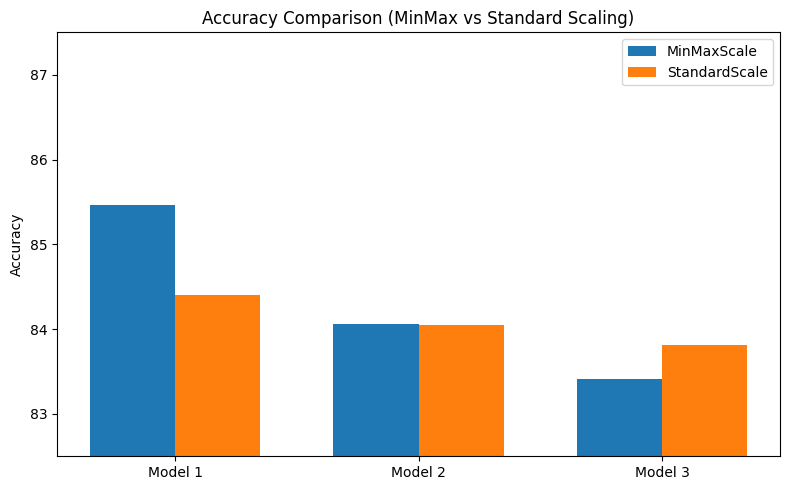

In [90]:
labels = ['Model 1', 'Model 2', 'Model 3']

mm_values = [model1_mm[0].iloc[3], model2_mm[0].iloc[3], model3_mm[0].iloc[3]]
std_values = [model1_std[0].iloc[3], model2_std[0].iloc[3], model3_std[0].iloc[3]]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))

# mm 막대
plt.bar([p - width/2 for p in x], mm_values, width, label='MinMaxScale')

# std 막대
plt.bar([p + width/2 for p in x], std_values, width, label='StandardScale')

plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison (MinMax vs Standard Scaling)')
plt.legend()
plt.tight_layout()
plt.ylim(82.5, 87.5)
 
plt.show()


In [ ]:
"""
k값이 증가할수록 model의 정확도가 떨어지는 경향이 있었다.

k값의 크기가 전체 표본의 크기 대비 얼마나 큰지,
그리고 labeling된 데이터들의 범주 개수가 몇 개인지, 어느 정도 몰려 있는지에 따라
상이한 결과가 나타날 것이라고 예상한다. 

그리고 k값이 15일 때에는 StandardScaler를 사용하는 것이 MinMaxScaler를 사용하는 것보다 정확도가 더 높았다.
k값이 커질수록 MinMaxScaler를 사용하는 것보다 StandardScaler를 사용하는 것이 더 높은 정확도를 얻는 것 같다.

표본의 크기가 커짐에 따라서 전체 자료가 정규분포 또는 그와 유사한 형태에 수렴할 것이라고 예상해볼 수 있다.

"""